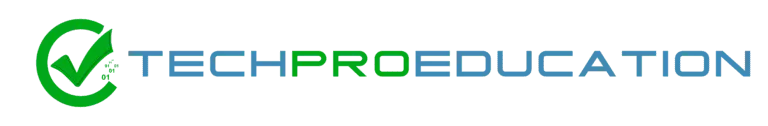

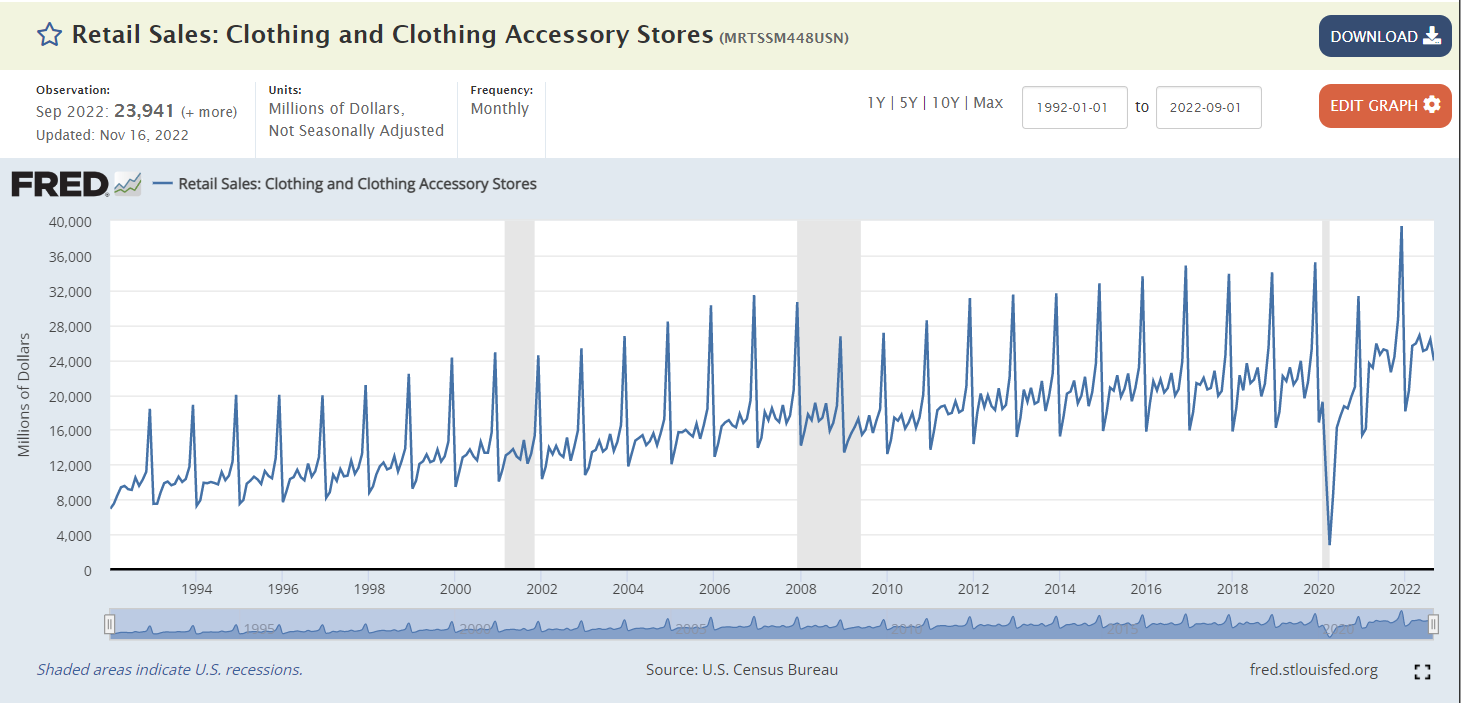

# RNN (Time Series)

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [125]:
df = pd.read_csv('RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [126]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [127]:
df.tail()

,RSCCASN
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [129]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

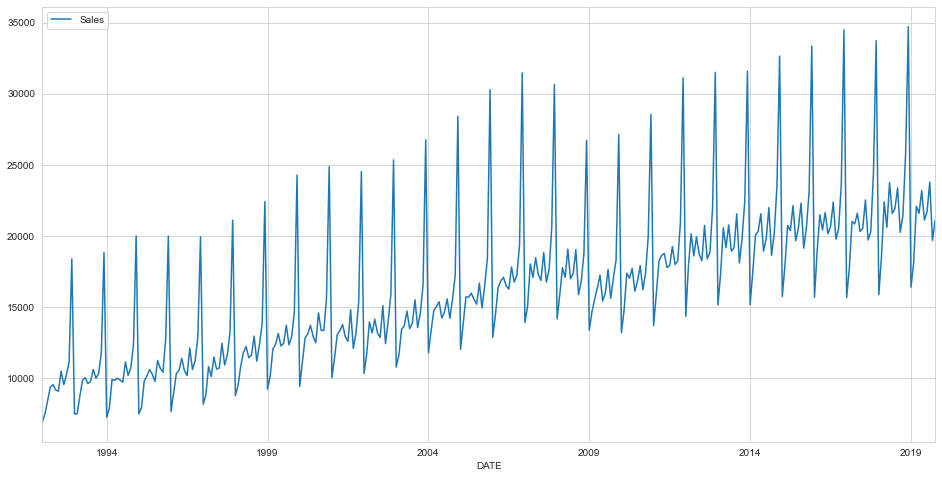

In [130]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [131]:
len(df)

334

In [132]:
test_size = 24

In [133]:
test_index = len(df)- test_size
test_index

310

In [134]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [135]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [136]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


### Scaling

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
scaler = MinMaxScaler()

In [139]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [140]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [141]:
# help(TimeseriesGenerator)

In [189]:
length = 12    # 12 tane satır al 13'üncüyü tahmin et..
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)   # shuffle= false

In [ ]:
#310-12 = 298 (batch size= 1 ve stride= 1 olduğu için)

In [143]:
len(generator)

298

In [144]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [145]:
X, y = generator[0]

In [146]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


## Modelling

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [148]:
train_scaled.shape

(310, 1)

In [149]:
n_features = train_scaled.shape[1]
n_features


1

In [150]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))  
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [190]:
# return_sequences= iki Rnn arka arkaya gelince sequence leri unutmasın diye bunu veriyoruz. 

In [151]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [152]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [153]:
4 * ((100+1)*50+(50**2))

30200

### EarlyStopping and Validation Generator

In [154]:
from tensorflow.keras.callbacks import EarlyStopping

In [155]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [156]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [157]:
len(validation_generator)

12

In [158]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
298/298 [==============================] - 7s 12ms/step - loss: 0.0259 - val_loss: 0.0225
Epoch 2/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0188 - val_loss: 0.0277
Epoch 3/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 4/20
298/298 [==============================] - 4s 12ms/step - loss: 0.0108 - val_loss: 0.0070
Epoch 5/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 6/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 7/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0023 - val_loss: 0.0127
Epoch 8/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 9/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 10/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0015 - val_lo

<AxesSubplot:>

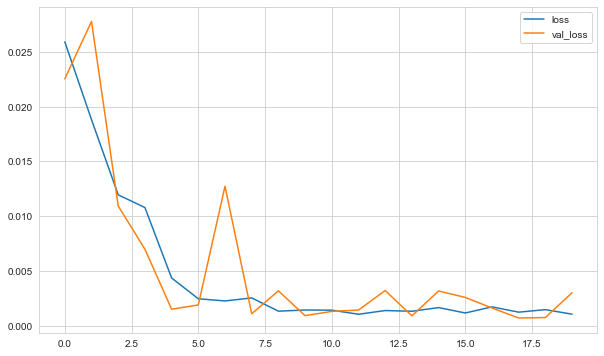

In [159]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [161]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [162]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [163]:
current_pred

array([[0.53890294]], dtype=float32)

In [164]:
current_batch

array([[[0.67226171],
        [1.06606853],
        [0.38607374],
        [0.45052519],
        [0.5618912 ],
        [0.55632985],
        [0.58459121],
        [0.53888828],
        [0.54563665],
        [0.6184063 ],
        [0.51867181],
        [0.53890294]]])

In [165]:
predictions_scaled

[array([0.6722617], dtype=float32),
 array([1.0660685], dtype=float32),
 array([0.38607374], dtype=float32),
 array([0.4505252], dtype=float32),
 array([0.5618912], dtype=float32),
 array([0.55632985], dtype=float32),
 array([0.5845912], dtype=float32),
 array([0.5388883], dtype=float32),
 array([0.54563665], dtype=float32),
 array([0.6184063], dtype=float32),
 array([0.5186718], dtype=float32),
 array([0.53890294], dtype=float32)]

In [166]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.9217133627027464 
mae: 0.03187483660635105 
mse: 0.001733847462789367 
rmse: 0.04163949402657731


### Inverse Transformations and Comparing

In [167]:
predictions = scaler.inverse_transform(predictions_scaled)

In [168]:
compare = test[:12]

In [169]:
compare['Predictions'] = predictions

In [170]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,25454.777
2017-12-01,33720,36301.792
2018-01-01,15881,17572.015
2018-02-01,18585,19347.266
2018-03-01,22404,22414.731
2018-04-01,20616,22261.549
2018-05-01,23764,23039.980
2018-06-01,21589,21781.139
2018-07-01,21919,21967.016


<AxesSubplot:xlabel='DATE'>

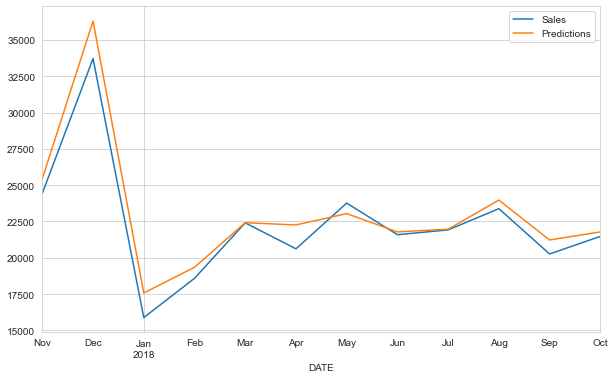

In [171]:
compare.plot()

In [172]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.9217133627027465 
mae: 877.9604994853311 
mse: 1315421.411323094 
rmse: 1146.918223468044


## Retrain and Forecasting

In [173]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [174]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [175]:
len(df)

334

In [176]:
len(generator)

322

In [177]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 7s 11ms/step - loss: 0.0242
Epoch 2/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0153
Epoch 3/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0077
Epoch 4/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0030
Epoch 5/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0018
Epoch 6/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0021
Epoch 7/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0016
Epoch 8/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0015
Epoch 9/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0012
Epoch 10/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0013
Epoch 11/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0014
Epoch 12/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0012
Epoch 13/15
3

In [178]:
scaled_full_data.shape

(334, 1)

In [179]:
scaled_full_data[-length:].shape

(12, 1)

In [180]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [181]:
forecast = scaler.inverse_transform(forecast)

In [182]:
forecast

array([[25894.91352367],
       [34019.94250202],
       [16853.67457724],
       [18275.77513552],
       [21919.12777948],
       [21466.90600777],
       [23050.05734873],
       [21061.82873869],
       [21591.97454834],
       [23580.97642279],
       [19763.08519626],
       [20988.34563541]])

In [183]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [184]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [185]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [186]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [187]:
forecast_df

,Forecast
2019-11-01,25894.914
2019-12-01,34019.943
2020-01-01,16853.675
2020-02-01,18275.775
2020-03-01,21919.128
2020-04-01,21466.906
2020-05-01,23050.057
2020-06-01,21061.829
2020-07-01,21591.975
2020-08-01,23580.976


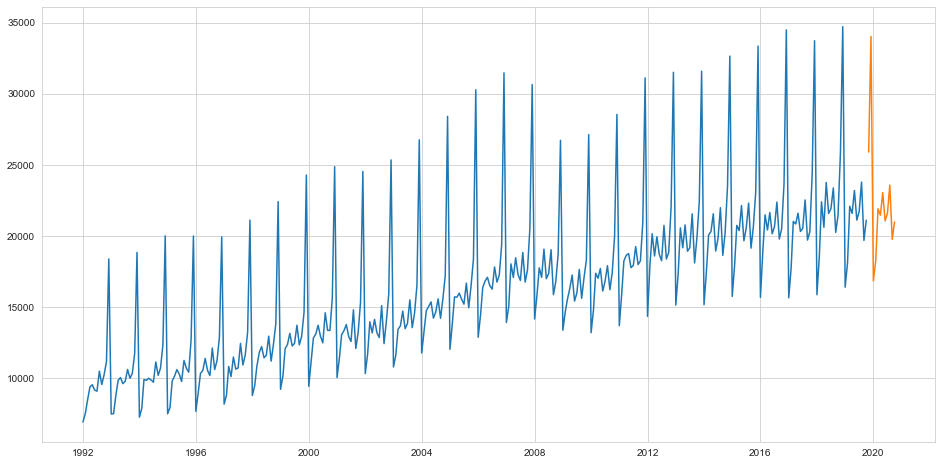

In [188]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

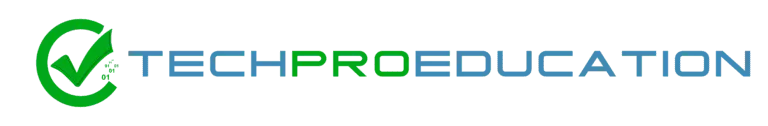